# nonlinear ode -von del pol

\begin{equation}
\frac{d^2u}{dt^2} = \mu (1 - u^2) \frac{du}{dt} + x 
\end{equation}

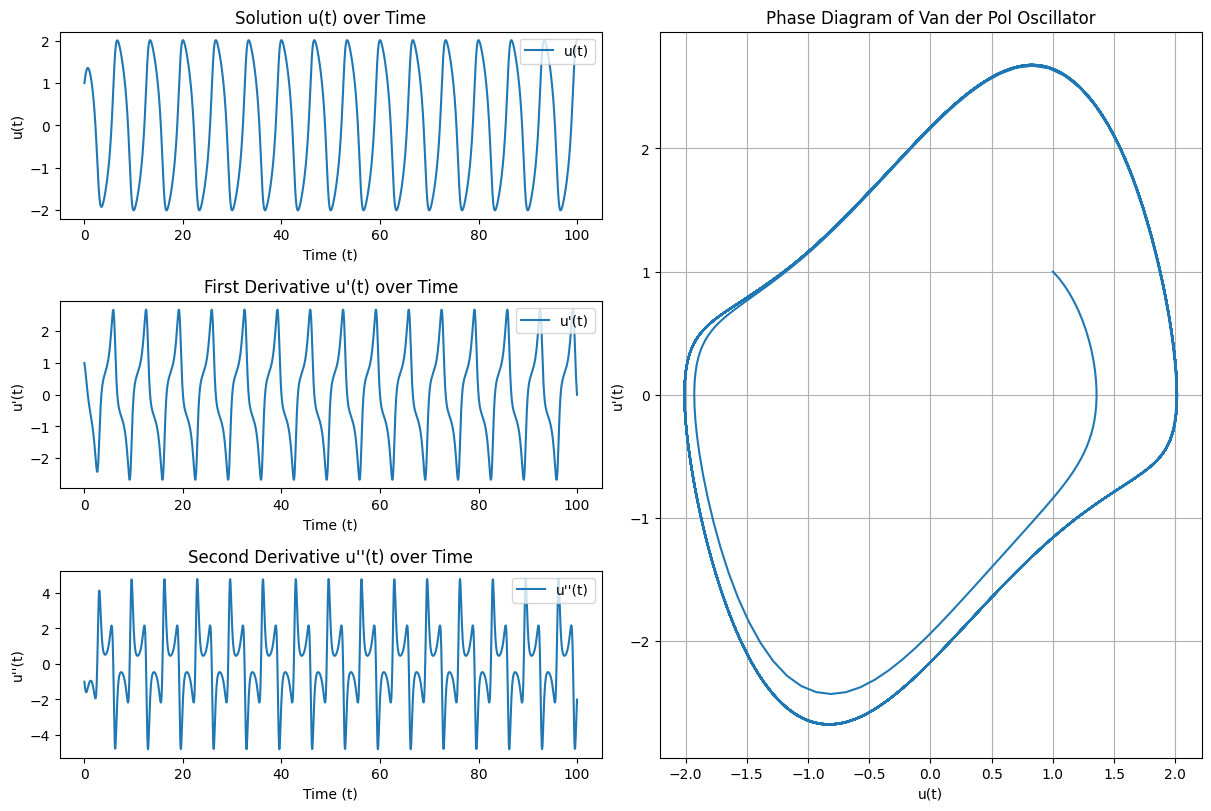

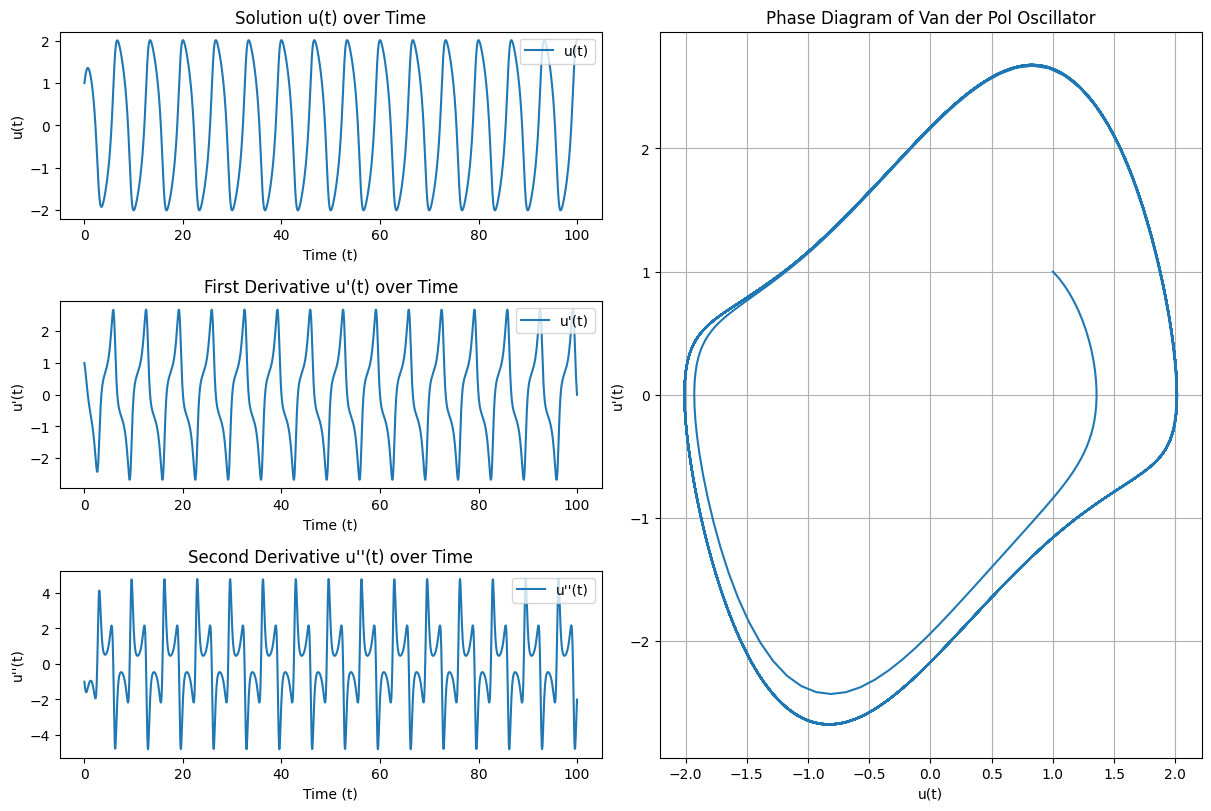

'vdp_solution.mat'

In [32]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.io import savemat
class VanDerPolSolver:
    def __init__(self, mu, t_span, u0, du0):
        self.mu = mu
        self.t_span = t_span
        self.initial_conditions = [u0, du0]

    def van_der_pol_system(self, t, y):
        u, v = y
        du_dt = v
        dv_dt = self.mu * (1 - u**2) * v - u
        return [du_dt, dv_dt]

    def solve(self):
        solution = solve_ivp(self.van_der_pol_system, self.t_span, self.initial_conditions, method='RK45', t_eval=np.linspace(self.t_span[0], self.t_span[1], 2000))
        return solution

    def plot_solution(self, solution):
        t = solution.t
        u = solution.y[0, :]
        du = solution.y[1, :]  # First derivative
        ddu = self.mu * (1 - u**2) * du - u  # Second derivative
        
        fig = plt.figure(layout="constrained", figsize=(12, 8))
        gs = GridSpec(3, 4, figure=fig)
        ax1 = fig.add_subplot(gs[0, 0:2])

        ax2 = fig.add_subplot(gs[1, 0:2])
        ax3 = fig.add_subplot(gs[2,0:2])
        ax4=fig.add_subplot(gs[:,2:])

        ax1.plot(t, u, label='u(t)')
        ax1.set_xlabel('Time (t)')
        ax1.set_ylabel('u(t)')
        ax1.set_title('Solution u(t) over Time')
        ax1.legend(loc='upper right')

        ax2.plot(t, du, label="u'(t)")
        ax2.set_xlabel('Time (t)')
        ax2.set_ylabel("u'(t)")
        ax2.set_title("First Derivative u'(t) over Time")
        ax2.legend(loc='upper right')

        ax3.plot(t, ddu, label="u''(t)")
        ax3.set_xlabel('Time (t)')
        ax3.set_ylabel("u''(t)")
        ax3.set_title("Second Derivative u''(t) over Time")
        ax3.legend(loc='upper right')

        ax4.plot(u, du)
        ax4.set_xlabel('u(t)')
        ax4.set_ylabel("u'(t)")
        ax4.set_title("Phase Diagram of Van der Pol Oscillator")
        ax4.grid(True)
        plt.savefig("vdp.png")
        plt.show()
        
        return t, u, du, ddu

    def save_to_mat(self, filename, solution):
        t, u, du, ddu = self.plot_solution(solution)
        data = {'t': t, 'u': u, 'du': du, 'ddu': ddu}
        savemat(filename, data)
        return filename

# Example usage
mu =1 # Van der Pol parameter
vdp_solver = VanDerPolSolver(mu, t_span=(0, 100), u0=1, du0=1)
solution = vdp_solver.solve()
vdp_solver.plot_solution(solution)
mat_file = vdp_solver.save_to_mat("vdp_solution.mat", solution)
mat_file